In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import os
import re

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


2023-12-10 14:46:07.935304: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d12.dat
11
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d20.dat
19
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d08_te.dat
7
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d04_te.dat
3
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d06.dat
5
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d20_te.dat
19
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d00.dat
-1
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d02.dat
1
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d16_te.dat
15
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d19_te.dat
18
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d05.dat
4
Look, i found a file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d09.dat
8
Look, i

/tmp/ipykernel_88516/2484051613.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Platzierung der Subplots


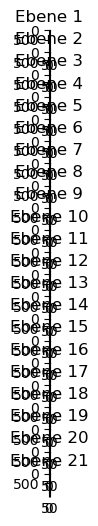

In [2]:
#Daten einlesen
RELPATH = '/home/ki-projekt/KI-Projekt/data/TennesseEastman/'

data = []
dataTE = []
index = 0
indexTE = 0

# Dateien einlesen ############# aktuelles Problem: die Daten werden nicht der Reihe nach eingelesen ############
for datei in os.listdir(RELPATH):
    filePath = RELPATH + datei

    print('Look, i found a file: ' + filePath)
    number = re.search(r'\d+', datei).group()
    column_index = int(number) - 1  # Index in Python beginnt bei 0
    print(column_index)

    if 'te' in datei:
        with open(filePath, 'r') as file:
              	#Datei einlesen
                lines = file.read().splitlines()

                 # Füge die Daten in die entsprechende Spalte basierend auf der Zahl im Dateinamen ein
                if column_index >= 0:
                    if len(data) <= column_index:
                        data.extend([[] for _ in range(column_index - len(data) + 1)])
                    data[column_index].extend([list(map(float, line.split()[:480])) for line in lines])

            
                #dataTE.append([list(map(float, line.split()[:52])) for line in lines])
                
                #dataTE[indexTE] = np.transpose(dataTE[indexTE])
                #dataTE[indexTE] = dataTE[indexTE][:, :480]

                #size = (len(dataTE[indexTE]), len(dataTE[indexTE][0]))
                #print(f'Größe der Matrix aus {datei}: {size}')
                #indexTE += 1
            
    #else:
        #with open(filePath, 'r') as file:
                #lines = file.read().splitlines()
                #data.append([list(map(float, line.split()[:480])) for line in lines])

                #size = (len(data[index]), len(data[index][0]))
                #if (size[0] > 52):
                 #     data[index] = np.transpose(data[index])
                #print(f'Größe der Matrix aus {datei}: {size}')
                #index += 1

matrix_data = np.array(data)
matrix_dataTE = np.array(dataTE)


# Annahme: matrix_data ist deine dreidimensionale NumPy-Array-Matrix mit den Daten

# Darstellung der Daten als Bilder in einer Schleife
fig, axs = plt.subplots(matrix_data.shape[0], figsize=(6, 6))  # Erstellt eine Subplot-Figur für jede Ebene

for i in range(matrix_data.shape[0]):
    axs[i].imshow(matrix_data[i], cmap='viridis')  # Annahme: Verwendung des 'viridis' Farbschemas für die Darstellung
    axs[i].set_title(f'Ebene {i+1}')  # Setze den Titel für jede Ebene

plt.tight_layout()  # Platzierung der Subplots
plt.show()  # Anzeigen der Bilder




In [3]:
print(matrix_data.shape)
print(matrix_data.dtype)


(21, 960, 52)
float64


In [4]:
print(matrix_data)

[[[2.5025e-01 3.6572e+03 4.5201e+03 ... 4.7459e+01 4.1841e+01 1.8049e+01]
  [2.5135e-01 3.6621e+03 4.5323e+03 ... 4.7403e+01 4.1188e+01 1.8008e+01]
  [2.5045e-01 3.6819e+03 4.4936e+03 ... 4.7265e+01 4.1290e+01 1.8009e+01]
  ...
  [7.5920e-01 3.6255e+03 4.5012e+03 ... 6.4318e+01 4.0789e+01 1.7699e+01]
  [7.8204e-01 3.6340e+03 4.5081e+03 ... 6.4357e+01 4.1169e+01 1.9572e+01]
  [7.8337e-01 3.6489e+03 4.5328e+03 ... 6.4556e+01 4.0861e+01 1.5280e+01]]

 [[2.5054e-01 3.6823e+03 4.5529e+03 ... 4.7500e+01 4.1234e+01 1.9604e+01]
  [2.4945e-01 3.6683e+03 4.5585e+03 ... 4.7666e+01 4.1197e+01 1.7827e+01]
  [2.4937e-01 3.6593e+03 4.4645e+03 ... 4.7579e+01 4.1495e+01 1.9826e+01]
  ...
  [2.6026e-01 3.6707e+03 4.6764e+03 ... 2.1951e+01 4.1482e+01 1.9546e+01]
  [2.5254e-01 3.6787e+03 4.6521e+03 ... 2.1732e+01 4.1449e+01 2.0224e+01]
  [2.5200e-01 3.6749e+03 4.6809e+03 ... 2.1677e+01 4.0849e+01 1.5360e+01]]

 [[2.5103e-01 3.6309e+03 4.5340e+03 ... 4.7338e+01 4.1219e+01 1.6837e+01]
  [2.4927e-01 3.6418e+

In [5]:
print("Minimum:", np.min(matrix_data))
print("Maximum:", np.max(matrix_data))
print("Durchschnitt:", np.mean(matrix_data))
print("Standardabweichung:", np.std(matrix_data))


Minimum: -0.58124
Maximum: 4984.6
Durchschnitt: 360.7211875108043
Standardabweichung: 994.914686045516


Text(0, 0.5, 'Werte')

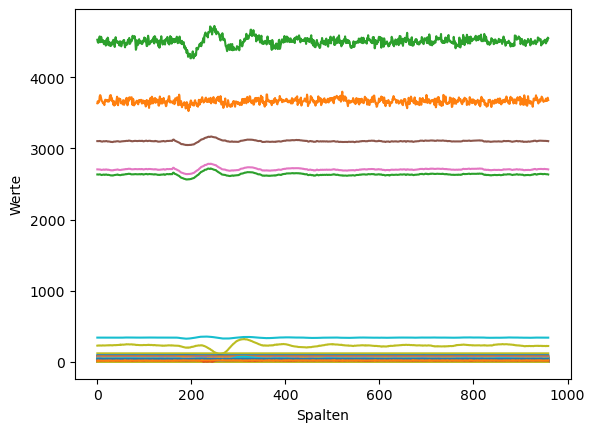

In [22]:
# Beispiel: Plot der ersten Zeile
# matrix_data[Fehler(-1), ]
plt.plot(matrix_data[4])
plt.xlabel('Spalten')
plt.ylabel('Werte')

In [7]:
# Annahme: my_data enthält deine Daten mit dem korrekten Verlauf in der ersten Spalte und den Fehlern in den folgenden Spalten
my_data = matrix_data 

In [8]:
# Daten vorbereiten
X = my_data[:, 0].reshape(-1, 1)  # Eingangsdaten: Korrekter Verlauf
y = my_data[:, 1:]  # Zielvariablen: Fehlerklassen

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1092, 21]

In [ ]:
# Skalierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modell erstellen (LSTM)
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modell trainieren
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

In [ ]:
# Modellbewertung
train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
# Confusion Matrix
y_pred = model.predict_classes(X_test_scaled)
y_true = [i.argmax() for i in y_test]
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

In [ ]:
# Classification Report
class_report = classification_report(y_true, y_pred)
print('Classification Report:')
print(class_report)